In [371]:
print("hi")

hi


In [372]:
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from  langchain_huggingface import HuggingFaceEmbeddings
import os
from typing import List
from typing import TypedDict,Annotated,Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage,AIMessage

In [373]:
load_dotenv()

True

In [374]:
groq_api_key=os.getenv("groq_api_key")
os.environ["groq_api_key"]=groq_api_key

In [461]:
model=ChatGroq(model="llama-3.1-8b-instant",api_key=groq_api_key)

In [462]:
model.invoke("hi").content

'How can I assist you today?'

In [464]:
embeddings=HuggingFaceEmbeddings(model_name="BAAI/bge-large-en-v1.5")

In [465]:
len(embeddings.embed_query("hi"))

1024

In [466]:
from langchain_community.document_loaders import TextLoader,DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [467]:
loader = DirectoryLoader(
    "/Users/fardeenkhan/coding/LANGGRAPH/data2",
    glob="*.txt",
    loader_cls=TextLoader
)


In [468]:
docs=loader.load()

In [469]:
docs

[Document(metadata={'source': '/Users/fardeenkhan/coding/LANGGRAPH/data2/us.txt'}, page_content="🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP

In [470]:
docs[0].page_content

"🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hover

In [471]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)

In [472]:
new_docs=text_splitter.split_documents(documents=docs)

In [473]:
doc_string=[doc.page_content for doc in new_docs]

In [474]:
db=Chroma.from_documents(new_docs,embeddings)

In [475]:
retriever=db.as_retriever(search_kwargs={"k":3})

In [476]:
retriever.invoke("what is the industrial growth of usa")

[Document(metadata={'source': '/Users/fardeenkhan/coding/LANGGRAPH/data2/us.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': '/Users/fardeenkhan/coding/LANGGRAPH/data2/us.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': '/Users/fardeenkhan/coding/LANGGRAPH/data2/us.txt'}, page_content='🇺🇸 Overview of the U.S. Economy')]

In [477]:
from pydantic import BaseModel,Field

In [478]:
class Topicselectionparser(BaseModel):
    Topic:str=Field(description="selected topic")
    reasoning:str=Field(description="Reasoning behind the topic selection")

In [479]:
!pip install langchain

In [480]:
from langchain_core.output_parsers import PydanticOutputParser
from typing import TypedDict,Annotated,Sequence
from langchain_core.messages import BaseMessage

In [481]:
parser=PydanticOutputParser(pydantic_object=Topicselectionparser)

In [525]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "reasoning": {"description": "Reasoning behind the topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "reasoning"]}\n```'

In [526]:
'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "reasoning": {"description": "Reasoning behind the topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "reasoning"]}\n```'

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "reasoning": {"description": "Reasoning behind the topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "reasoning"]}\n```'

In [527]:
import operator


In [528]:
class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],operator.add]


In [529]:
AgentState={}


In [530]:
AgentState["messages"]=[]

In [531]:
AgentState


{'messages': []}

In [532]:
AgentState

{'messages': []}

In [533]:
AgentState["messages"].append("what are you doing?")

In [534]:
AgentState

{'messages': ['what are you doing?']}

In [535]:
AgentState["messages"].append("i hope everything is fine")

In [536]:
AgentState

{'messages': ['what are you doing?', 'i hope everything is fine']}

In [537]:
AgentState["messages"][-1]

'i hope everything is fine'

In [538]:
AgentState["messages"][0]

'what are you doing?'

In [539]:
from langchain_core.prompts import PromptTemplate

In [540]:
def function_1(state: AgentState):
    question=state["messages"][-1]
    print("question",question)

    template=""" your task is to identify user given query into one of the category:[USA,Not related].
    only respond with category name nothing else.
    user query:{question}
    {format_instructions}
    """
    prompt=PromptTemplate(
        template=template,
        input_variables=["question"],
        partial_variables={"format_instructions":parser.get_format_instructions()}
    )
    chain=prompt|model|parser
    response=chain.invoke({"question":question})
    print("Parsed response:",response)

    return{"messages":[response.Topic]}
    

In [541]:
state={"messages":["what is todays wheater?"]}

In [542]:
function_1(state)

question what is todays wheater?
Parsed response: Topic='Not related' reasoning='The query is about weather, but it does not explicitly mention the USA, so it is classified as not related.'


{'messages': ['Not related']}

In [543]:
state={"messages":["what is the GDP of USA?"]}

In [544]:
function_1(state)

question what is the GDP of USA?
Parsed response: Topic='USA' reasoning='The query is related to economic data of the USA, specifically GDP.'


{'messages': ['USA']}

In [545]:
class TopicSeletionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    reasoning:str=Field(description="reasoning behind the topic selection")

In [546]:
def router(state:AgentState):
    print("- > ROUTER - >")
    last_message=state["messages"][-1]
    print("last_message:",last_message)
    if "usa" in last_message.lower():
        return "RAG CALL"
    else:
        return "llm_call"

In [547]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [548]:
def function_2(state:AgentState):
    print(" -- > RAG CALL -->")
    question=state["messages"][0]
    prompt=PromptTemplate(
        template="""ypu are an assistance for question answering task.use the following piece of etrieved context to answer the question.if you dont know the answer just say that you dont know the answer
        use three sentence maximum to keep the answer crips and clear: \nQuestion:{question}\nContext:
        {context}\n Answer:""",
        input_variables=['context','question']
    )

    rag_chain=(
        {"context":retriever|format_docs,"question":RunnablePassthrough()}
        |prompt
        |model
        | StrOutputParser()
    )
    result= rag_chain.invoke(question)
    return{"messgaes":[result]}

In [549]:
def function_3(state:AgentState):
    print("--> llm_call-->")
    question=state["messages"][0]

    complete_query="Answer thefollowing questions with real world knowledge.Following is the user query: "+question
    response=model.invoke(complete_query)
    return{"messages":[response.content]}

In [550]:
state={"messages":["hi"]}

In [551]:
function_3(state)

--> llm_call-->


{'messages': ['It looks like you just said "hi." How can I assist you today? Is there something specific you\'d like to talk about or ask about?']}

In [552]:
from langgraph.graph import StateGraph,END

In [556]:
workflow=StateGraph(AgentState)

In [557]:


workflow.add_node("Supervisor",function_1)

In [558]:
workflow.add_node("RAG",function_2)

In [559]:
workflow.add_node("llm_call",function_3)

In [560]:
workflow.set_entry_point("Supervisor")

In [561]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG CALL":"RAG",
        "llm_call":"llm_call"
    }
)

In [562]:
workflow.add_edge("RAG",END)
workflow.add_edge("llm_call",END)

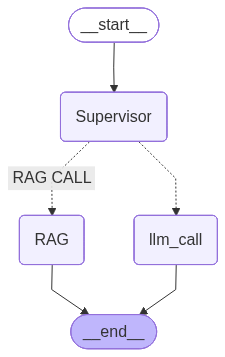

In [563]:
workflow.compile()

In [564]:
app=workflow.compile()

In [565]:
state={"messages":["usa gdp"]}

In [566]:
app.invoke(state)

question usa gdp
Parsed response: Topic='USA' reasoning='usa gdp relates to USA'
- > ROUTER - >
last_message: USA
 -- > RAG CALL -->


{'messages': ['usa gdp', 'USA']}

In [572]:
state={"messages":["hi"]}

In [574]:
app.invoke(state)

question hi
Parsed response: Topic='Not related' reasoning='No relevant information provided'
- > ROUTER - >
last_message: Not related
--> llm_call-->


{'messages': ['hi',
  'Not related',
  "It seems like you're trying to initiate a conversation or ask a question. However, it appears to be a simple greeting. If you have a specific topic in mind or need assistance with something, feel free to ask, and I'll do my best to provide a helpful response. What's on your mind?"]}

In [569]:
state={"messages": ["What is the GDP of USA?"]}

In [570]:
app.invoke(state)


question What is the GDP of USA?
Parsed response: Topic='USA' reasoning='The query contains information about the USA, specifically GDP.'
- > ROUTER - >
last_message: USA
 -- > RAG CALL -->


{'messages': ['What is the GDP of USA?', 'USA']}